# ANN - Perceptron

In [1]:
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
from sklearn.linear_model import Perceptron
from sklearn.metrics.pairwise import distance
from itertools import product
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset = [[0, 0], [0, 1], [1, 0], [1, 1]]
labels = [0, 0, 0, 1]

In [4]:
classifier = Perceptron(max_iter=30)
classifier.fit(dataset, labels)

classifier.score(dataset, labels)

1.0

In [5]:
x_values = np.linspace(0, 1, 100)
y_values = np.linspace(0, 1, 100)

In [6]:
point_grid = list(product(x_values, y_values))
distances = classifier.decision_function(point_grid)
abs_distances = [abs(pt) for pt in distances]

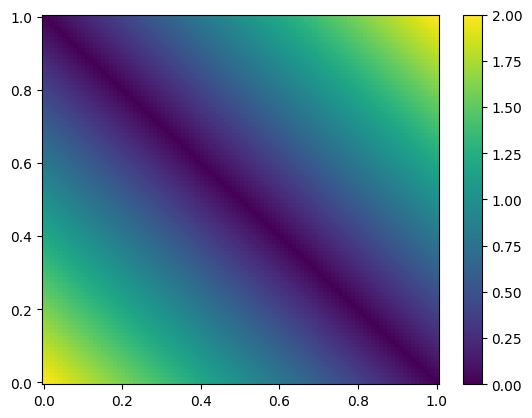

In [7]:
distance_matrix = np.reshape(abs_distances, (100, 100))
heatmap = plt.pcolormesh(x_values, y_values, distance_matrix)

plt.colorbar(heatmap)
plt.show()

Solução sem biblioteca de Machine Learning

In [8]:
def f(u):
    if u >= 0:
        return 1
    else:
        return -1

def findOutput(data, w):
    u = 0.0
    for i in range(0, len(data)):
        u += data[i] * w[i]

    return f(u)

# initialization
p = [[1, 1, -1], [1, -1, -1], [-1, 1, -1], [-1, -1, -1]]
d = [1, 1, 1, -1]
w = np.random.rand(len(p[0]))

c = 0.5
d_error = 0.01

iter = 0
while True:
    error = 0
    for i in range(0, len(p)):
        o = findOutput(p[i], w)
        error += ((d[i] - o) ** 2) / 2
        learningSignal = c * (d[i] - o)
        for k in range(0, len(p[i])):
            w[k] += learningSignal * p[i][k]

    iter += 1
    print(error, "##", w)
    if error < d_error:
        print('N. iterations:', iter)
        break

print(findOutput([1, 1, -1], w))
print(findOutput([1, -1, -1], w))
print(findOutput([-1, 1, -1], w))
print(findOutput([-1, -1, -1], w))

2.0 ## [-0.11922157  1.38287576 -0.52152159]
4.0 ## [ 1.88077843  1.38287576 -0.52152159]
0.0 ## [ 1.88077843  1.38287576 -0.52152159]
N. iterations: 3
1
1
1
-1
